In [23]:
import cv2
import numpy as np

In [11]:
from PIL import Image

In [6]:
from sklearn.decomposition import NMF

In [9]:
yasuna = '../desk/sample.png'

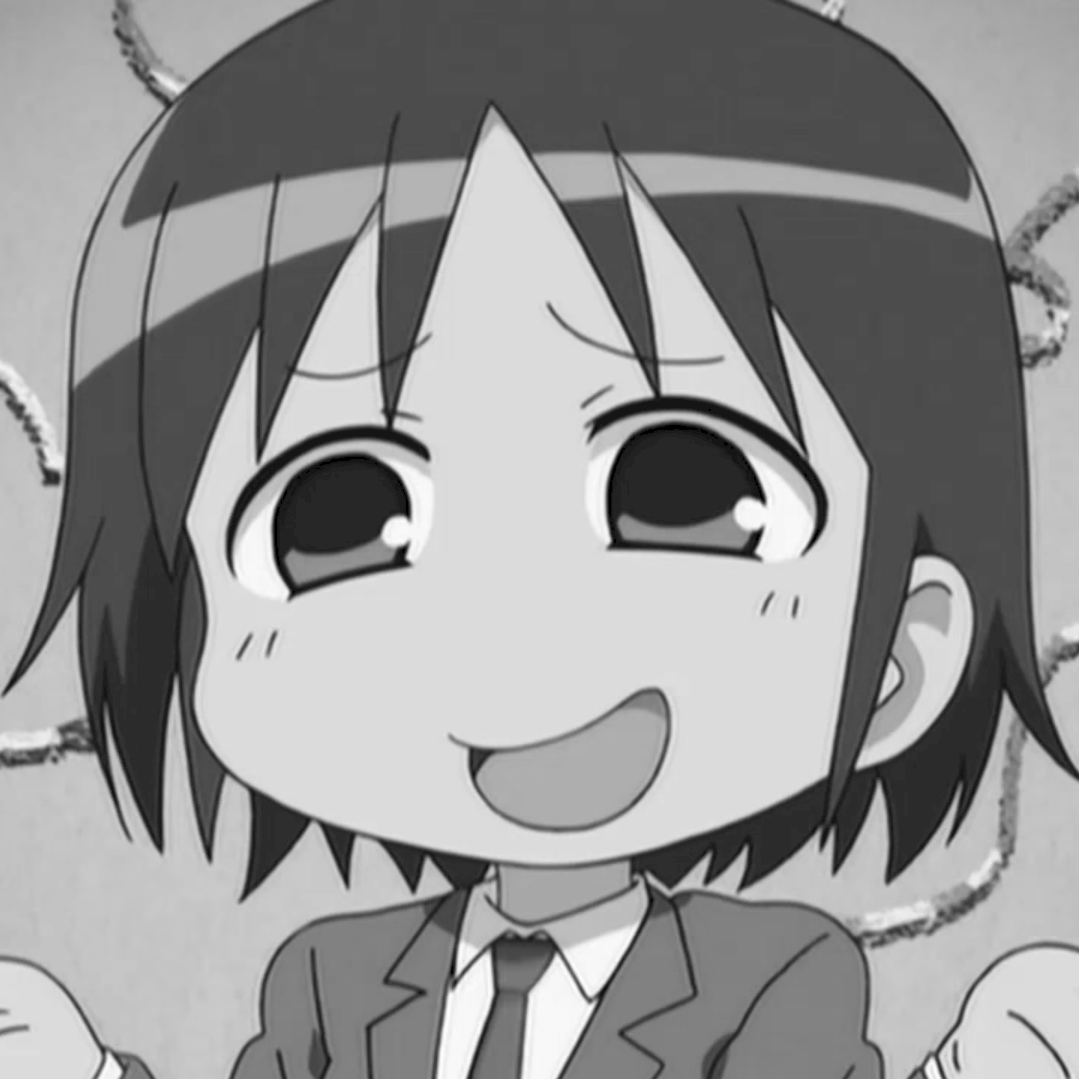

In [30]:
Image.fromarray(img)

In [15]:
img.shape

(1079, 1079)

In [31]:
img = cv2.imread(yasuna, 0)
img

array([[160, 160, 160, ..., 161, 160, 160],
       [159, 160, 160, ..., 161, 160, 160],
       [159, 160, 160, ..., 161, 160, 160],
       ...,
       [219, 219, 219, ..., 212, 209, 211],
       [219, 219, 219, ..., 211, 209, 211],
       [219, 219, 219, ..., 212, 209, 210]], dtype=uint8)

In [32]:
estimator = NMF(n_components=10)
W = estimator.fit_transform(img)
H = estimator.components_
W.shape, H.shape

((1079, 10), (10, 1079))

In [54]:
def show(arr):
    newimg = (arr).astype(np.uint8)
    Image.fromarray(newimg)

In [43]:
negimiku = '../desk/negimiku.png'

In [51]:
img2 = cv2.imread(negimiku, 0)

In [52]:
estimator = NMF(n_components=10)
estimator.fit(img)
estimator.fit(img2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [53]:
W = estimator.transform(img2)
H = estimator.components_

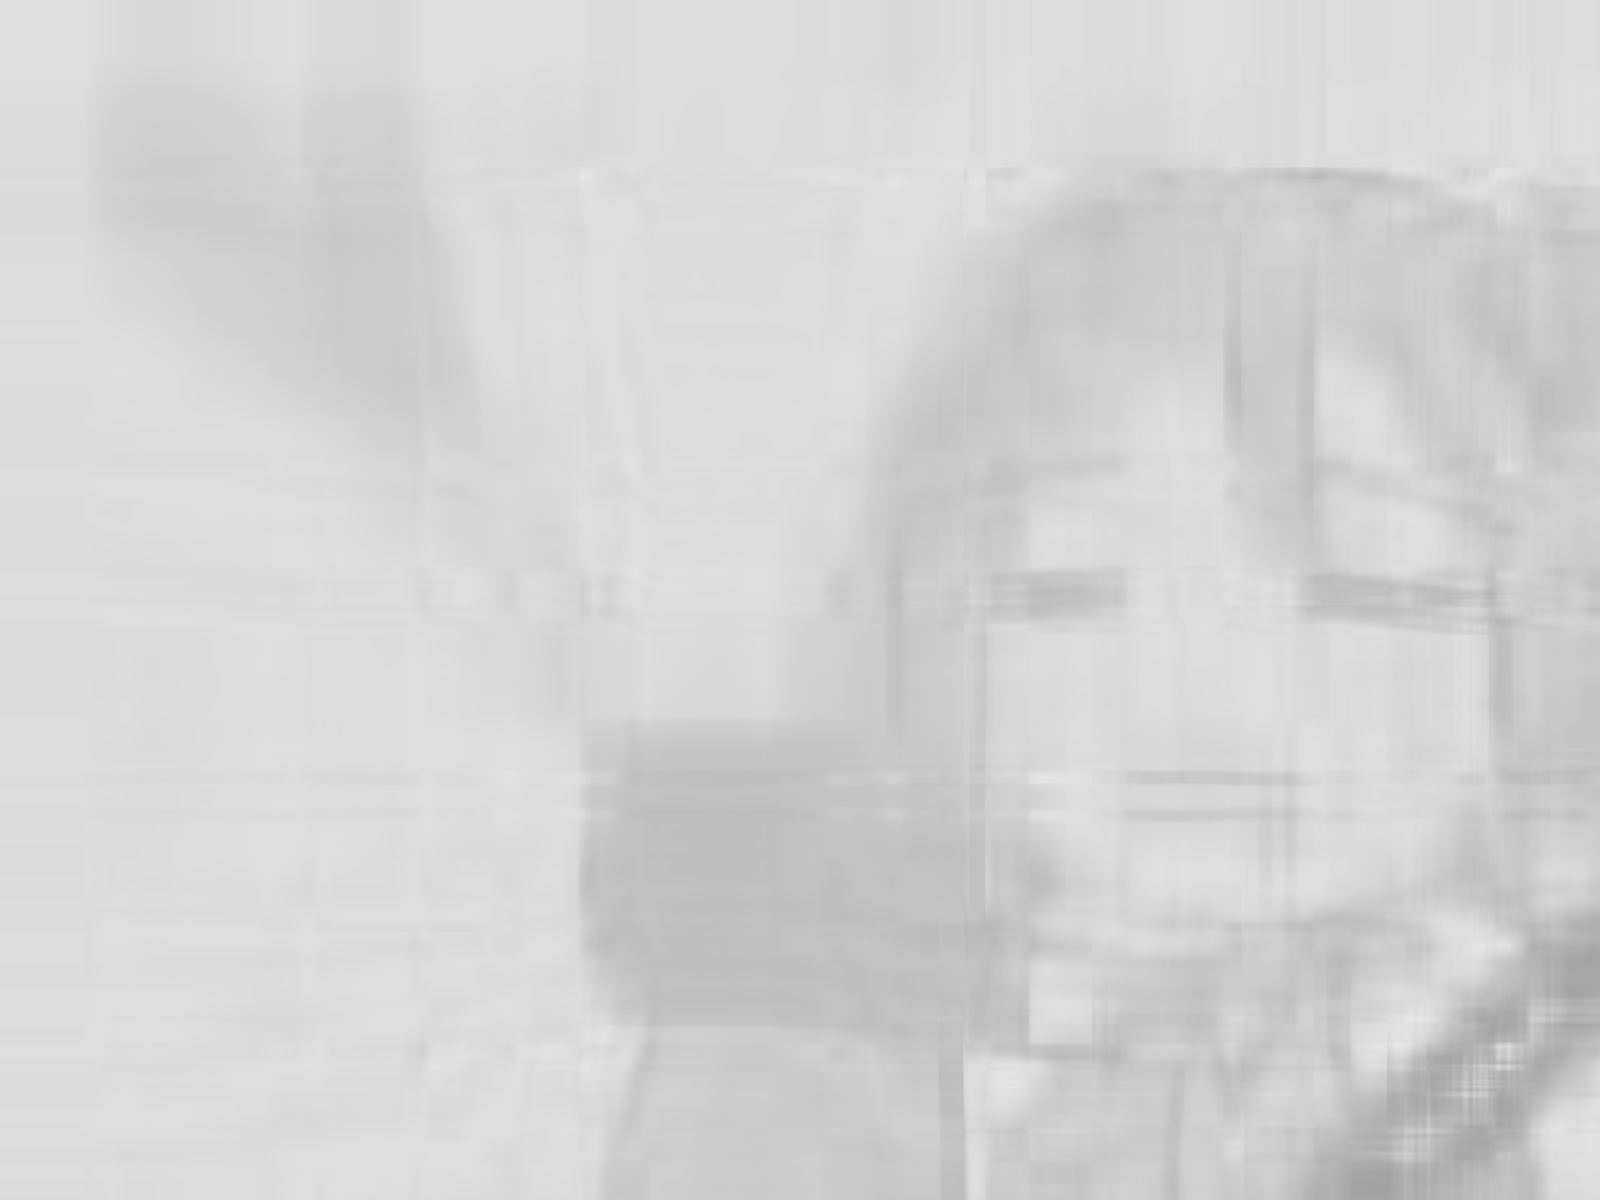

In [56]:
Image.fromarray((W@H).astype(np.uint8))

In [57]:
yasuna2 = '../desk/yasuna.png'
img3 = cv2.imread(yasuna2, 0)

In [60]:
img.shape, img2.shape

((1079, 1079), (1200, 1600))

In [59]:
W = estimator.transform(img3)
Image.fromarray((W@H).astype(np.uint8))

ValueError: Array with wrong shape passed to NMF (input H). Expected (10, 1920), but got (10, 1600) 

In [61]:
img.shape

(1079, 1079)

In [58]:
img3

array([[101, 101, 101, ..., 124, 126, 127],
       [101, 101, 101, ..., 124, 126, 127],
       [102, 102, 102, ..., 125, 126, 127],
       ...,
       [122, 122, 122, ..., 124, 124, 124],
       [122, 122, 122, ..., 124, 124, 124],
       [122, 122, 122, ..., 124, 124, 124]], dtype=uint8)

In [74]:
def load(imgfile):
    resize = (128, 128)
    img = Image.open(imgfile).resize(resize, Image.LANCZOS).convert('L')
    return np.array(img).astype(np.uint8)

In [75]:
img = load(yasuna)
img2 = load(negimiku)
img3 = load(yasuna2)

In [77]:
estimator = NMF(n_components=10)
estimator.fit(img)
estimator.fit(img2)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=10, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

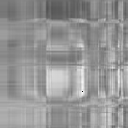

In [78]:
W = estimator.transform(img3)
H = estimator.components_

Image.fromarray((W@H).astype(np.uint8))

In [79]:
img3.shape

(128, 128)

In [80]:
img3

array([[ 91,  93,  95, ..., 105, 102, 112],
       [ 93,  94,  97, ..., 104, 108, 121],
       [ 93,  94,  96, ..., 107, 118, 101],
       ...,
       [113, 116, 119, ..., 105, 122, 115],
       [112, 115, 118, ..., 119, 117, 115],
       [112, 114, 117, ..., 118, 115, 114]], dtype=uint8)